In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("../CleanedData/cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("../CleanedData/cleaned_inventory.csv")

#top&bottom csvs
T_pop = pd.read_csv("../TopBottom/mostchangedpop.csv")
B_pop = pd.read_csv("../TopBottom/leastchangedpop.csv")
T_house = pd.read_csv("../TopBottom/top10inventory.csv")
B_house = pd.read_csv("../TopBottom/bottom10inventory.csv")
T_rental = pd.read_csv("../TopBottom/top10rental.csv")
B_rental = pd.read_csv("../TopBottom/bottom10rental.csv")

#data set with changing rates
population_df = pd.read_csv("../PopRelated/sorted_population_final.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

#all house price csv 
house_df = pd.read_csv("../RawData/HomePriceFull.csv")

In [10]:
#finding the bottom 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Columbus") & (housing_df["State"]=="GA")]
df2 = housing_df.loc[(housing_df["City"]=="Midland") & (housing_df["State"]=="TX")]
df3 = housing_df.loc[(housing_df["City"]=="Fayetteville") & (housing_df["State"]=="NC")]
df4 = housing_df.loc[(housing_df["City"]=="Tempe") & (housing_df["State"]=="AZ")]
df5 = housing_df.loc[(housing_df["City"]=="Surprise") & (housing_df["State"]=="AZ")]
df6 = housing_df.loc[(housing_df["City"]=="Fremont") & (housing_df["State"]=="CA")]
df7 = housing_df.loc[(housing_df["City"]=="Moreno Valley") & (housing_df["State"]=="CA")]
df8 = housing_df.loc[(housing_df["City"]=="North Las Vegas") & (housing_df["State"]=="NV")]
df9 = housing_df.loc[(housing_df["City"]=="Denton") & (housing_df["State"]=="TX")]
df10 = housing_df.loc[(housing_df["City"]=="Indianapolis") & (housing_df["State"]=="IN")]
df11 = housing_df.loc[(housing_df["City"]=="Omaha") & (housing_df["State"]=="NE")]
df12 = housing_df.loc[(housing_df["City"]=="Pittsburgh") & (housing_df["State"]=="PA")]
df13 = housing_df.loc[(housing_df["City"]=="Newport News") & (housing_df["State"]=="VA")]
df14 = housing_df.loc[(housing_df["City"]=="Ontario") & (housing_df["State"]=="CA")]
df15 = housing_df.loc[(housing_df["City"]=="Tulsa") & (housing_df["State"]=="OK")]
df16 = housing_df.loc[(housing_df["City"]=="Port Saint Lucie") & (housing_df["State"]=="FL")]
df17 = housing_df.loc[(housing_df["City"]=="Saint Louis") & (housing_df["State"]=="MO")]
df18 = housing_df.loc[(housing_df["City"]=="Oklahoma City") & (housing_df["State"]=="OK")]
df19 = housing_df.loc[(housing_df["City"]=="Murfreesboro") & (housing_df["State"]=="TN")]
df20 = housing_df.loc[(housing_df["City"]=="Yonkers") & (housing_df["State"]=="NY")]



#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
bottom_df = pd.concat(frames).reset_index(drop=True)
bottom_df



,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate
0,169,Columbus,GA,9.933292e+04,1.039322e+05,1.093953e+05,4.425242,4.993967
1,204,Midland,TX,2.436319e+05,2.707442e+05,2.651911e+05,10.014002,-2.094014
2,103,Fayetteville,NC,1.184733e+05,1.239264e+05,1.295862e+05,4.400259,4.367598
3,174,Tempe,AZ,2.757105e+05,2.917946e+05,3.171243e+05,5.512125,7.987325
4,268,Surprise,AZ,2.508628e+05,2.652201e+05,2.857418e+05,5.413366,7.181902
5,114,Fremont,CA,1.102804e+06,1.090738e+06,1.085007e+06,-1.106262,-0.528148
6,141,Moreno Valley,CA,3.256356e+05,3.401662e+05,3.562850e+05,4.271613,4.524140
7,113,North Las Vegas,NV,2.494712e+05,2.662613e+05,2.738752e+05,6.305897,2.780058
8,276,Denton,TX,2.409089e+05,2.494300e+05,2.566359e+05,3.416222,2.807826
9,13,Indianapolis,IN,1.381447e+05,1.496126e+05,1.593342e+05,7.665075,6.101413


In [11]:
#finding the top 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Salt Lake City") & (housing_df["State"]=="UT")]
df2 = housing_df.loc[(housing_df["City"]=="Hialeah") & (housing_df["State"]=="FL")]
df3 = housing_df.loc[(housing_df["City"]=="Jersey City") & (housing_df["State"]=="NJ")]
df4 = housing_df.loc[(housing_df["City"]=="Irvine") & (housing_df["State"]=="CA")]
df5 = housing_df.loc[(housing_df["City"]=="Alexandria") & (housing_df["State"]=="VA")]
df6 = housing_df.loc[(housing_df["City"]=="Bellevue") & (housing_df["State"]=="WA")]
df7 = housing_df.loc[(housing_df["City"]=="Garland") & (housing_df["State"]=="TX")]
df8 = housing_df.loc[(housing_df["City"]=="Glendale") & (housing_df["State"]=="CA")]
df9 = housing_df.loc[(housing_df["City"]=="Clarksville") & (housing_df["State"]=="TN")]
df10 = housing_df.loc[(housing_df["City"]=="Tampa") & (housing_df["State"]=="FL")]
df11 = housing_df.loc[(housing_df["City"]=="Miami") & (housing_df["State"]=="FL")]
df12 = housing_df.loc[(housing_df["City"]=="Dallas") & (housing_df["State"]=="TX")]
df13 = housing_df.loc[(housing_df["City"]=="Des Moines") & (housing_df["State"]=="IA")]
df14 = housing_df.loc[(housing_df["City"]=="Waco") & (housing_df["State"]=="TX")]
df15 = housing_df.loc[(housing_df["City"]=="Seattle") & (housing_df["State"]=="WA")]
df16 = housing_df.loc[(housing_df["City"]=="Boston") & (housing_df["State"]=="MA")]
df17 = housing_df.loc[(housing_df["City"]=="Irving") & (housing_df["State"]=="TX")]
df18 = housing_df.loc[(housing_df["City"]=="Salem") & (housing_df["State"]=="OR")]
df19 = housing_df.loc[(housing_df["City"]=="Eugene") & (housing_df["State"]=="OR")]
df20 = housing_df.loc[(housing_df["City"]=="Saint Petersburg") & (housing_df["State"]=="FL")]

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
top_df = pd.concat(frames).reset_index(drop=True)
top_df



,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate
0,149,Salt Lake City,UT,372028.333333,403676.583333,426918.222222,7.840001,5.444049
1,92,Hialeah,FL,274104.083333,287202.833333,295955.000000,4.560801,2.957263
2,89,Jersey City,NJ,509275.250000,515026.750000,529459.333333,1.116738,2.725910
3,105,Irvine,CA,894327.500000,895065.666667,903923.000000,0.082471,0.979877
4,207,Alexandria,VA,502257.583333,523444.250000,552416.888889,4.047550,5.244705
5,247,Bellevue,WA,924025.833333,900209.750000,953660.000000,-2.645615,5.604749
6,110,Garland,TX,193970.333333,206703.666667,211902.555556,6.160187,2.453434
7,139,Glendale,CA,820642.916667,832062.666667,873757.222222,1.372463,4.771870
8,185,Clarksville,TN,178903.666667,187340.000000,200576.666667,4.503221,6.599305
9,55,Tampa,FL,231498.666667,243883.250000,258432.666667,5.078079,5.629867


In [19]:
top_df['City, State']= ''
city_state = top_df['City'].map(str)+', ' + top_df['State'].map(str) 
top_df['City, State'] = city_state

bottom_df['City, State']= ''
city_state = bottom_df['City'].map(str)+', ' + bottom_df['State'].map(str) 
bottom_df['City, State'] = city_state


,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate,"City, State"
0,149,Salt Lake City,UT,372028.333333,403676.583333,426918.222222,7.840001,5.444049,"Salt Lake City, UT"
1,92,Hialeah,FL,274104.083333,287202.833333,295955.000000,4.560801,2.957263,"Hialeah, FL"
2,89,Jersey City,NJ,509275.250000,515026.750000,529459.333333,1.116738,2.725910,"Jersey City, NJ"
3,105,Irvine,CA,894327.500000,895065.666667,903923.000000,0.082471,0.979877,"Irvine, CA"
4,207,Alexandria,VA,502257.583333,523444.250000,552416.888889,4.047550,5.244705,"Alexandria, VA"
5,247,Bellevue,WA,924025.833333,900209.750000,953660.000000,-2.645615,5.604749,"Bellevue, WA"
6,110,Garland,TX,193970.333333,206703.666667,211902.555556,6.160187,2.453434,"Garland, TX"
7,139,Glendale,CA,820642.916667,832062.666667,873757.222222,1.372463,4.771870,"Glendale, CA"
8,185,Clarksville,TN,178903.666667,187340.000000,200576.666667,4.503221,6.599305,"Clarksville, TN"
9,55,Tampa,FL,231498.666667,243883.250000,258432.666667,5.078079,5.629867,"Tampa, FL"


In [29]:
top_df.columns

Index(['Unnamed: 0', 'City', 'State', 'Average2018', 'Average2019',
       'Average2020', '2018-2019 changing rate', '2019-2020 changing rate',
       'City, State'],
      dtype='object')

In [60]:
pull_columns = ['City, State','2018-2019 changing rate','2019-2020 changing rate']
new_top = top_df[pull_columns]
new_bottom = bottom_df[pull_columns]




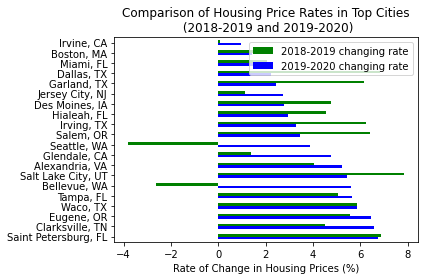

In [72]:
new_top = new_top.sort_values(by='2019-2020 changing rate')
ax = new_top.plot.barh(color=["green","blue"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Top Cities\n (2018-2019 and 2019-2020)")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_top["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_top["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Output/Q2TopComparisonRates.png')
plt.show()

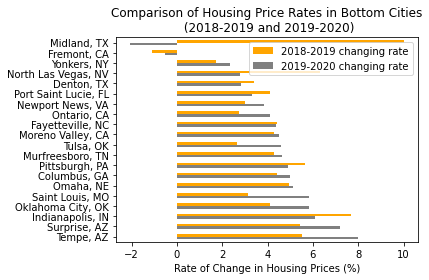

In [71]:
new_bottom= new_bottom.sort_values(by='2019-2020 changing rate')
ax = new_bottom.plot.barh(color=["orange","gray"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Bottom Cities\n (2018-2019 and 2019-2020)")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_bottom["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_bottom["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Output/Q2BottomComparisonRates.png')
plt.show()